In [67]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
df = pd.read_csv('tips.xls')
%matplotlib inline
df.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.total_bill.max()

50.81

<AxesSubplot:>

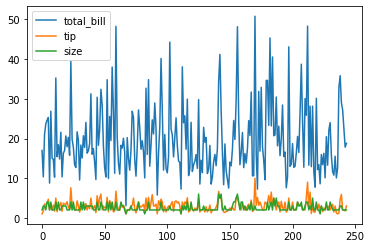

In [9]:
df.plot()

<AxesSubplot:ylabel='Frequency'>

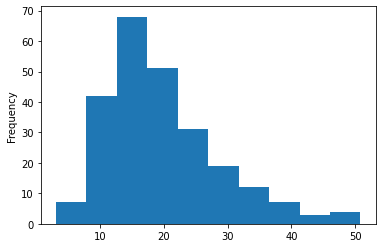

In [10]:
df.total_bill.plot(kind='hist')

<AxesSubplot:title={'center':'Общая сумма счета'}, ylabel='Frequency'>

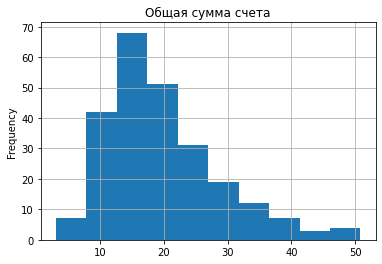

In [11]:
df.total_bill.plot(kind='hist', grid=True, title='Общая сумма счета')

<AxesSubplot:title={'center':'Кол-во посетителей по дням'}>

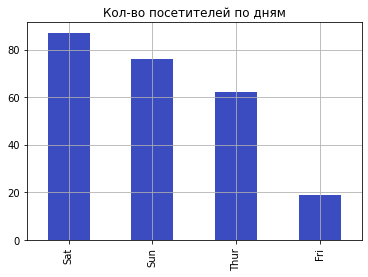

In [12]:
df.day.value_counts().plot(kind='bar', grid=True, colormap='coolwarm', title='Кол-во посетителей по дням')

array([<AxesSubplot:title={'center':'Общая сумма счета'}, ylabel='Frequency'>,
       <AxesSubplot:title={'center':'Сумма чаевых'}, ylabel='Frequency'>],
      dtype=object)

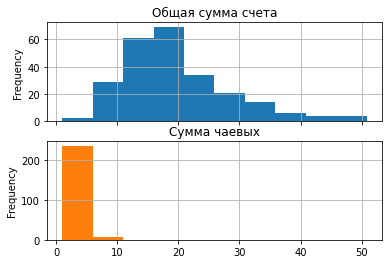

In [14]:
df[['total_bill', 'tip']].plot(kind='hist', grid=True, subplots=True, title=['Общая сумма счета', 'Сумма чаевых'], legend=False)

<AxesSubplot:title={'center':'Общая сумма счета вс сумма чаевых'}, xlabel='total_bill', ylabel='tip'>

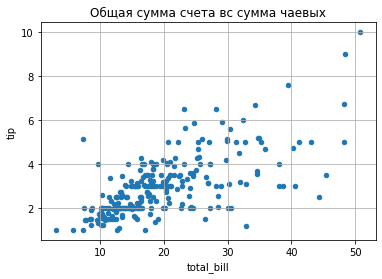

In [15]:
df.plot(x='total_bill', y='tip', kind='scatter', grid=True, title='Общая сумма счета вс сумма чаевых')

<AxesSubplot:xlabel='day'>

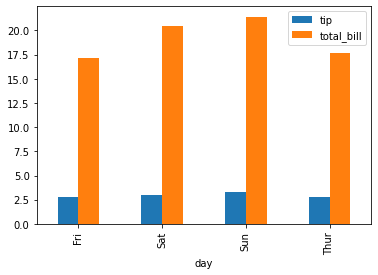

In [17]:
df.pivot_table(values=['total_bill', 'tip'], index='day', aggfunc='mean').plot(kind='bar')

В первой строке кода создаётся объект с именем fig, к которому применяются все настройки. Во второй строке создаётся координатная плоскость (axes), которая начинается в левом нижнем углу без отступов (координаты 0, 0) и занимает отведённое место в области (ширина и высота равны 1):
Теперь мы можем разместить в созданной нами координатной плоскости любую графическую информацию. Например, для построения гистограммы распределения признака «Общая сумма счёта» нам следует применить к axes метод hist:
У метода hist можно менять цвет диаграммы (color) и увеличивать количество столбцов для демонстрации распределения (bins).К графику можно добавить заголовки:

axes.set_title — заголовок диаграммы;
axes.set_ylabel — заголовок для оси ординат;
axes.set_xlabel — заголовок для оси абсцисс.

Text(0.5, 0, 'Сумма заказа, USD')

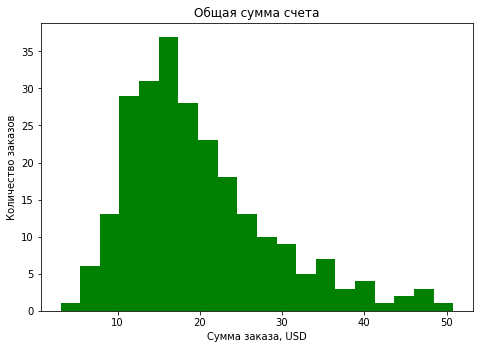

In [17]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.hist(df['total_bill'], bins=20, color='green')
axes.set_title('Общая сумма счета')
axes.set_ylabel('Количество заказов')
axes.set_xlabel('Сумма заказа, USD')

Text(0, 0.5, 'Размер чаевых')

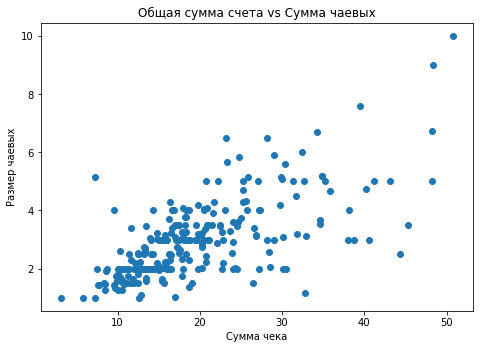

In [33]:
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(x=df['total_bill'], y=df['tip'], marker='o')
axes.set_title('Общая сумма счета vs Сумма чаевых')
axes.set_xlabel('Сумма чека')
axes.set_ylabel('Размер чаевых')

Несколько систем координат
Мы можем размещать несколько систем координат на одном объекте, что позволит нам отображать вспомогательную информацию на основном графике. Для добавления второй системы координат необходимо повторно применить к объекту fig метод add_axes, указав новое имя для второй системы координат.

Первые два числовых параметра, указанные при создании систем координат, — это отступ слева и снизу, а следующие два — ширина и высота относительно ширины и высоты всего пространства (в долях единицы) для построения графика.

В основную координатную плоскость разместим гистограмму распределения признака «Общая сумма счета», а в дополнительную — данные о максимальном и минимальном значении этого признака по дням недели. Для создания вспомогательного графика нужно предварительно обработать основной датафрейм и извлечь из него нужную информацию.

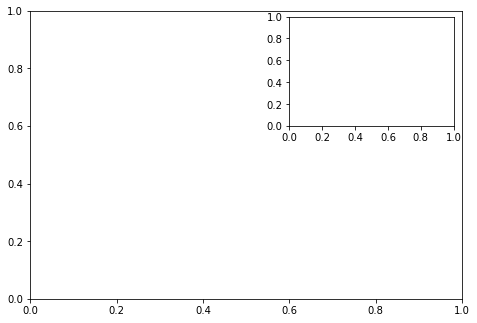

In [8]:
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])

<BarContainer object of 4 artists>

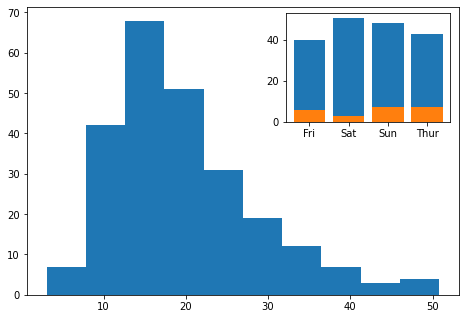

In [11]:
bills_per_day = df.groupby(by='day')['total_bill'].agg(['min', 'max']).reset_index()
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=bills_per_day['day'], height=bills_per_day['max'])
insert_axes.bar(x=bills_per_day['day'], height=bills_per_day['min'])

<BarContainer object of 4 artists>

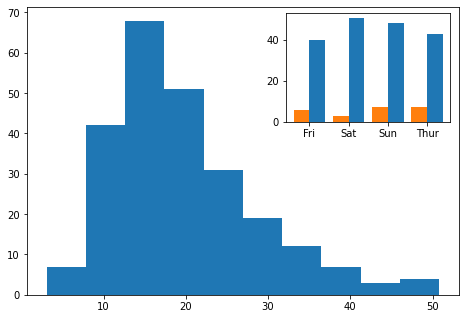

In [21]:
bills_per_day = df.groupby(by='day')['total_bill'].agg(['min', 'max']).reset_index()
fig = plt.figure()
main_axes = fig.add_axes([0, 0, 1, 1])
main_axes.hist(df['total_bill'])
insert_axes = fig.add_axes([0.6, 0.6, 0.38, 0.38])
insert_axes.bar(x=bills_per_day['day'], height=bills_per_day['max'], width=0.4, align='edge')
insert_axes.bar(x=bills_per_day['day'], height=bills_per_day['min'], width=-0.4, align='edge')

Если на графике отображаются данные из нескольких столбцов датафрейма, необходимо сопроводить график дополнительными пояснениями: какой цвет соответствует выводимой информации. Для этого добавим на график легенду при помощи метода legend к объекту axes. Для корректного отображения данных в легенде необходимо добавить параметр label. Место размещения легенды на координатной плоскости задаётся с помощью параметра loc:



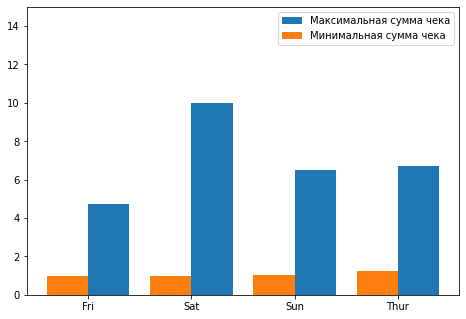

In [7]:
tips_per_day = df.groupby(by='day')['tip'].agg(['min', 'max']).reset_index()
fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.set_ylim(0,15)
axes.bar(x=tips_per_day['day'], height=tips_per_day['max'],
        width=0.4, align='edge', label='Максимальная сумма чека')
axes.bar(x=tips_per_day['day'],height=tips_per_day['min'],
        width=-0.4, align='edge', label='Минимальная сумма чека')
axes.legend(loc=1)

Text(0.5, 1.0, 'Общая сумма счета VS Сумма чаевых')

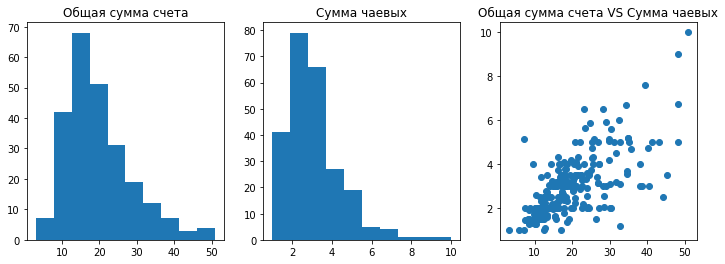

In [22]:
fig, axes = plt.subplots(1, 3, figsize=(12,4))
axes[0].hist(df['total_bill'])
axes[0].set_title('Общая сумма счета')

axes[1].hist(df['tip'])
axes[1].set_title('Сумма чаевых')

axes[2].scatter(x=df['total_bill'], y=df['tip'], marker='o')
axes[2].set_title('Общая сумма счета VS Сумма чаевых')

In [28]:
x = np.linspace(start=-3., stop=3., num=1000)
y1 = np.exp(x)

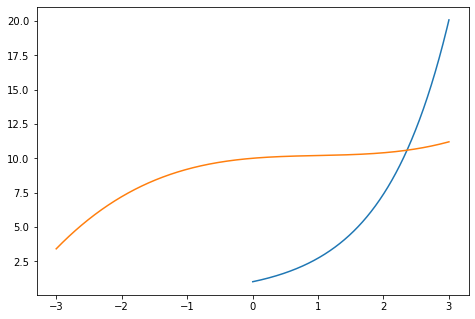

In [45]:
y2 = 10 + 0.4*x - 0.3*x**2 + 0.1*x**3

fig = plt.figure()
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[500:], y1[500:])
axes.plot(x, y2)

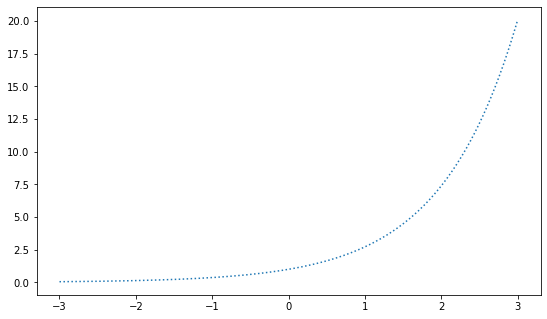

In [36]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x, y1, linestyle=':')

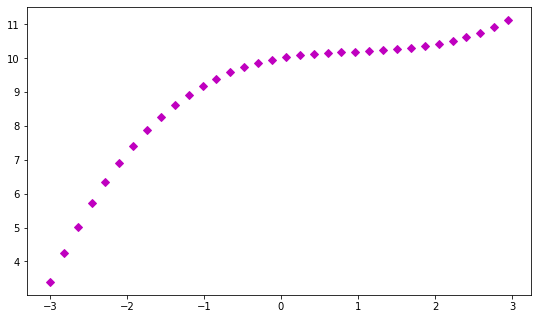

In [41]:
fig = plt.figure(figsize=(7, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.plot(x[::30], y2[::30], 'mD')

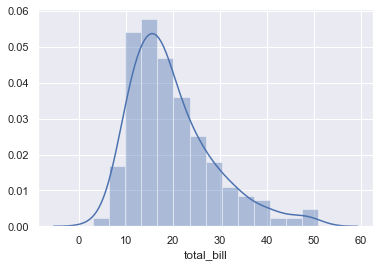

In [47]:
sns.set()
sns.distplot(df['total_bill'])

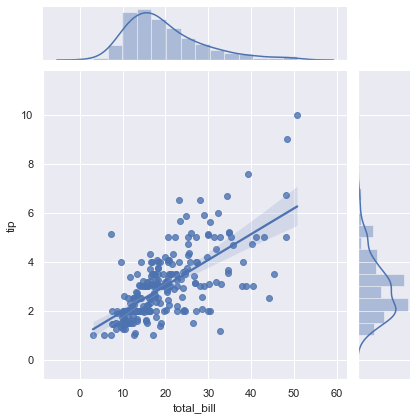

In [50]:
sns.jointplot(x='total_bill', y='tip', data=df, kind='reg')

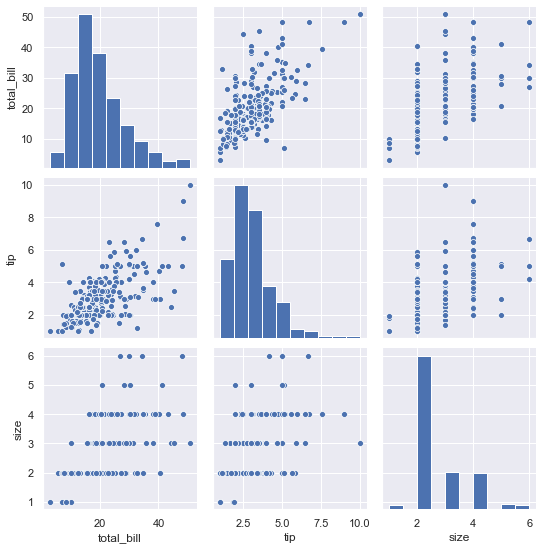

In [52]:
sns.pairplot(df)

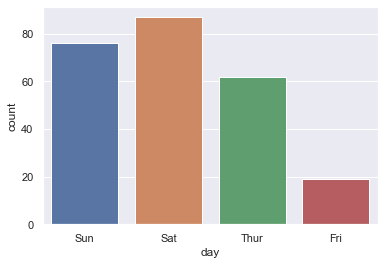

In [56]:
sns.countplot(x='day', data=df)

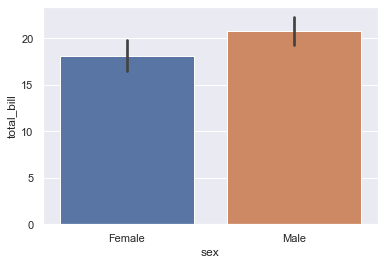

In [57]:
sns.barplot(x='sex', y='total_bill', data=df)

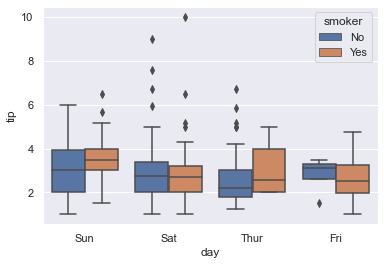

In [59]:
sns.boxplot(x='day', y='tip', data=df, hue='smoker')

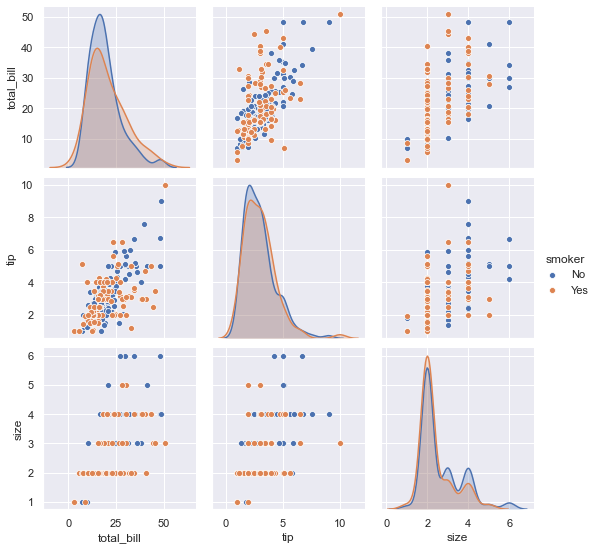

In [61]:
sns.pairplot(df, hue='smoker')

In [62]:
correlation = df.corr()


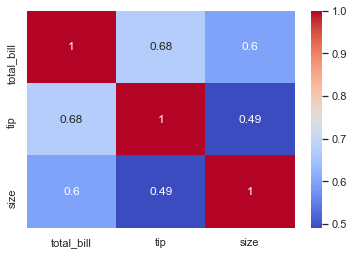

In [63]:
sns.heatmap(correlation, annot=True, cmap='coolwarm')

In [68]:
init_notebook_mode(connected=True)
cf.go_offline()

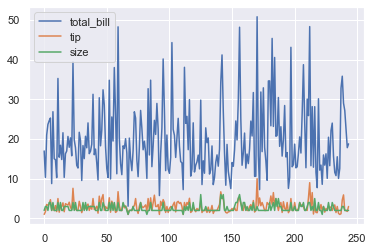

In [69]:
df.plot()

In [77]:
df.iplot()

In [76]:
df[['total_bill', 'tip']].iplot(kind='spread')

In [78]:
df.iplot(kind='bubble', x='total_bill', y='size', size='tip')